In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR

In [2]:
df = pd.read_csv("../data/Processed/missing_value_free.csv")
df.head()

,Unnamed: 0,Brand,CPU Name,CPU Mark,GPU Name,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,Storage Type,OS,Weight,Price
0,0,MSI,Intel Core i7 13620H,26454.0,GeForce RTX 2050,7320.0,15.6,1920.0,1080.0,16384.0,2097152.0,SSD,Windows 11,3.03,1529.00
1,3,Dell,Intel Core i7 1360P,19333.0,Intel Iris Pro Graphics 6200,1449.0,16.0,1920.0,1200.0,24576.0,1048576.0,SSD,Windows 10,2.47,1079.00
2,4,Dell,Intel Core i7 10700 2.90GHz,16550.0,Intel Arc A730M,8274.0,15.6,1920.0,1200.0,32768.0,1048576.0,SSD,Windows 10,1.92,1907.00
3,5,Asus,AMD Ryzen 9 7945HX,55651.0,GeForce RTX 4070,26876.0,17.3,2560.0,1400.0,16384.0,1048576.0,SSD,Windows 11,2.68,1959.99
4,6,Lenovo,AMD Ryzen 9 6900HX,24887.0,GeForce RTX 3070,22459.0,16.0,2560.0,1600.0,16384.0,1048576.0,SSD,Windows 11,2.62,1499.99


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2902 entries, 0 to 2901
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2902 non-null   int64  
 1   Brand           2902 non-null   object 
 2   CPU Name        2902 non-null   object 
 3   CPU Mark        2902 non-null   float64
 4   GPU Name        2902 non-null   object 
 5   GPU Mark        2902 non-null   float64
 6   Monitor         2902 non-null   float64
 7   Width           2902 non-null   float64
 8   Height          2902 non-null   float64
 9   RAM             2902 non-null   float64
 10  Storage Amount  2902 non-null   float64
 11  Storage Type    2902 non-null   object 
 12  OS              2902 non-null   object 
 13  Weight          2902 non-null   float64
 14  Price           2902 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 340.2+ KB


In [11]:
brands = df["Brand"].value_counts()

In [25]:
brands

Dell                  1014
Lenovo                 404
HP                     397
Acer                   369
Asus                   332
MSI                    222
LG                      48
Samsung                 24
Panasonic               23
GIGABYTE                19
Microsoft               15
Best Notebooks          10
Apple                    4
Razer                    3
IST Computers            1
14.0                     1
aichiw                   1
TechDeal                 1
GPDBRANDSTORE            1
Thomson                  1
Corsair                  1
XAMMUE                   1
Toshiba                  1
Best 2 in 1 Laptop       1
thunderb                 1
WEELIAO                  1
Yoga Notebook            1
Mavark                   1
HUNSN                    1
Best Notebook            1
Core Innovations         1
AWOW                     1
Name: Brand, dtype: int64

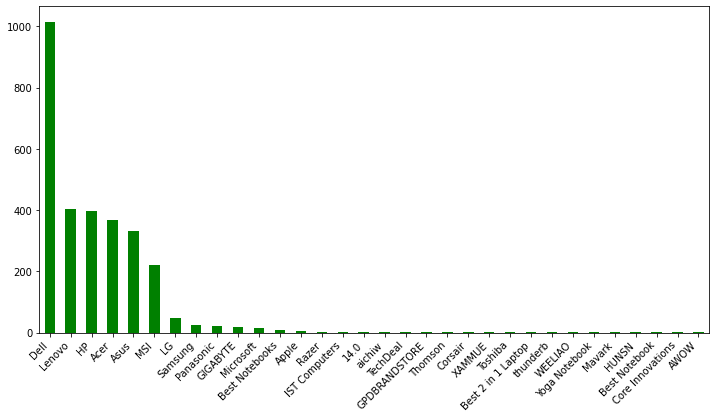

In [24]:
plt.figure(figsize=(12,6))
brands.plot(kind='bar', color='green')
plt.xticks(rotation=45, ha='right')
plt.show()

In [47]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [91]:
df_filtered = df[df["Brand"].isin(brands[brands>3].index.tolist())]
df_filtered = pd.get_dummies(df_filtered, columns=["Brand"])

df_filtered.drop(df_filtered.columns[:2], axis=1, inplace=True)
df_filtered.drop("GPU Name", axis=1, inplace=True)

In [84]:
df_filtered

,CPU Mark,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,Storage Type,OS,Weight,Price,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Best Notebooks,Brand_Dell,Brand_GIGABYTE,Brand_HP,Brand_LG,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Panasonic,Brand_Samsung
0,26454.0,7320.0,15.6,1920.0,1080.0,16384.0,2097152.0,SSD,Windows 11,3.03,1529.00,0,0,0,0,0,0,0,0,0,1,0,0,0
1,19333.0,1449.0,16.0,1920.0,1200.0,24576.0,1048576.0,SSD,Windows 10,2.47,1079.00,0,0,0,0,1,0,0,0,0,0,0,0,0
2,16550.0,8274.0,15.6,1920.0,1200.0,32768.0,1048576.0,SSD,Windows 10,1.92,1907.00,0,0,0,0,1,0,0,0,0,0,0,0,0
3,55651.0,26876.0,17.3,2560.0,1400.0,16384.0,1048576.0,SSD,Windows 11,2.68,1959.99,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24887.0,22459.0,16.0,2560.0,1600.0,16384.0,1048576.0,SSD,Windows 11,2.62,1499.99,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,387.0,1476.0,15.6,1366.0,768.0,8192.0,262144.0,SSD,ChromeOS,1.73,299.00,0,0,0,0,0,0,1,0,0,0,0,0,0
2898,15287.0,1449.0,15.6,1920.0,1080.0,49152.0,2097152.0,SSD,Windows 11,1.82,1129.99,0,0,0,0,0,0,1,0,0,0,0,0,0
2899,1556.0,1476.0,14.0,1366.0,768.0,4096.0,1024000.0,SSD,Windows 11,1.45,197.00,0,0,0,0,0,0,1,0,0,0,0,0,0
2900,10329.0,7320.0,16.0,1920.0,1200.0,16384.0,524288.0,SSD,Windows 10,1.45,1289.00,0,0,0,0,0,0,0,0,1,0,0,0,0


In [85]:
df_filtered.columns

Index(['CPU Mark', 'GPU Mark', 'Monitor', 'Width', 'Height', 'RAM',
       'Storage Amount', 'Storage Type', 'OS', 'Weight', 'Price', 'Brand_Acer',
       'Brand_Apple', 'Brand_Asus', 'Brand_Best Notebooks', 'Brand_Dell',
       'Brand_GIGABYTE', 'Brand_HP', 'Brand_LG', 'Brand_Lenovo', 'Brand_MSI',
       'Brand_Microsoft', 'Brand_Panasonic', 'Brand_Samsung'],
      dtype='object')

In [103]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2876 entries, 0 to 2901
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CPU Mark              2876 non-null   float64
 1   GPU Mark              2876 non-null   float64
 2   Monitor               2876 non-null   float64
 3   Width                 2876 non-null   float64
 4   Height                2876 non-null   float64
 5   RAM                   2876 non-null   float64
 6   Storage Amount        2876 non-null   float64
 7   Weight                2876 non-null   float64
 8   Price                 2876 non-null   float64
 9   Brand_Acer            2876 non-null   uint8  
 10  Brand_Apple           2876 non-null   uint8  
 11  Brand_Asus            2876 non-null   uint8  
 12  Brand_Best Notebooks  2876 non-null   uint8  
 13  Brand_Dell            2876 non-null   uint8  
 14  Brand_GIGABYTE        2876 non-null   uint8  
 15  Brand_HP             

In [102]:
df["Storage Type"].value_counts()

SSD       2879
Hybrid      22
14.0         1
Name: Storage Type, dtype: int64

In [93]:
df_filtered = pd.get_dummies(df_filtered, columns=["Storage Type"])

In [94]:
df_filtered

,CPU Mark,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,OS,Weight,Price,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Best Notebooks,Brand_Dell,Brand_GIGABYTE,Brand_HP,Brand_LG,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Panasonic,Brand_Samsung,Storage Type_Hybrid,Storage Type_SSD
0,26454.0,7320.0,15.6,1920.0,1080.0,16384.0,2097152.0,Windows 11,3.03,1529.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,19333.0,1449.0,16.0,1920.0,1200.0,24576.0,1048576.0,Windows 10,2.47,1079.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,16550.0,8274.0,15.6,1920.0,1200.0,32768.0,1048576.0,Windows 10,1.92,1907.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,55651.0,26876.0,17.3,2560.0,1400.0,16384.0,1048576.0,Windows 11,2.68,1959.99,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,24887.0,22459.0,16.0,2560.0,1600.0,16384.0,1048576.0,Windows 11,2.62,1499.99,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,387.0,1476.0,15.6,1366.0,768.0,8192.0,262144.0,ChromeOS,1.73,299.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2898,15287.0,1449.0,15.6,1920.0,1080.0,49152.0,2097152.0,Windows 11,1.82,1129.99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2899,1556.0,1476.0,14.0,1366.0,768.0,4096.0,1024000.0,Windows 11,1.45,197.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2900,10329.0,7320.0,16.0,1920.0,1200.0,16384.0,524288.0,Windows 10,1.45,1289.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [101]:
df["OS"].value_counts()

Windows 11             1769
Windows 10              997
ChromeOS                 95
Windows 7                14
Windows 8                13
No OS                     6
MacOS                     2
Windows 8.1               1
Windows Vista             1
OS X 10.10 Yosemite       1
Linux                     1
14.0                      1
Windows 14                1
Name: OS, dtype: int64

In [99]:
filtered_os = df_filtered["OS"].value_counts()
df_filtered = df_filtered[df_filtered["OS"].isin(filtered_os[filtered_os>1].index.tolist())]
df_filtered = pd.get_dummies(df_filtered, columns=["OS"])

In [100]:
df_filtered

,CPU Mark,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,Weight,Price,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Best Notebooks,Brand_Dell,Brand_GIGABYTE,Brand_HP,Brand_LG,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Panasonic,Brand_Samsung,Storage Type_Hybrid,Storage Type_SSD,OS_ChromeOS,OS_MacOS,OS_No OS,OS_Windows 10,OS_Windows 11,OS_Windows 7,OS_Windows 8
0,26454.0,7320.0,15.6,1920.0,1080.0,16384.0,2097152.0,3.03,1529.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,19333.0,1449.0,16.0,1920.0,1200.0,24576.0,1048576.0,2.47,1079.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,16550.0,8274.0,15.6,1920.0,1200.0,32768.0,1048576.0,1.92,1907.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,55651.0,26876.0,17.3,2560.0,1400.0,16384.0,1048576.0,2.68,1959.99,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,24887.0,22459.0,16.0,2560.0,1600.0,16384.0,1048576.0,2.62,1499.99,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,387.0,1476.0,15.6,1366.0,768.0,8192.0,262144.0,1.73,299.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2898,15287.0,1449.0,15.6,1920.0,1080.0,49152.0,2097152.0,1.82,1129.99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2899,1556.0,1476.0,14.0,1366.0,768.0,4096.0,1024000.0,1.45,197.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2900,10329.0,7320.0,16.0,1920.0,1200.0,16384.0,524288.0,1.45,1289.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [114]:
df_filtered.corr()

,CPU Mark,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,Weight,Price,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Best Notebooks,Brand_Dell,Brand_GIGABYTE,Brand_HP,Brand_LG,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Panasonic,Brand_Samsung,Storage Type_Hybrid,Storage Type_SSD,OS_ChromeOS,OS_MacOS,OS_No OS,OS_Windows 10,OS_Windows 11,OS_Windows 7,OS_Windows 8
CPU Mark,1.000000,0.490173,0.270168,0.315571,0.306046,0.344553,0.006253,0.157940,0.479713,-0.063076,-0.014055,0.022949,0.015105,0.179319,0.066679,-0.153179,0.016615,-0.101888,0.086582,-0.005814,-0.082914,-0.076173,-0.071122,0.071122,-0.203874,-0.030469,-0.017083,-0.140429,0.233502,-0.065087,-0.068445
GPU Mark,0.490173,1.000000,0.440457,0.316800,0.284242,0.386076,0.014536,0.211244,0.649136,0.078534,-0.029364,0.042261,0.043720,0.101409,0.120259,-0.199310,-0.097430,-0.158687,0.201386,-0.042051,-0.087023,-0.068166,-0.034807,0.034807,-0.170973,-0.023520,-0.039822,-0.115522,0.197872,-0.061937,-0.064044
Monitor,0.270168,0.440457,1.000000,0.240957,0.206379,0.307267,0.015889,0.179717,0.438686,0.064615,-0.037922,-0.017690,0.026732,0.033022,0.042482,-0.005977,0.048713,-0.099918,0.118773,-0.104301,-0.186071,-0.138885,-0.017269,0.017269,-0.258708,-0.020180,-0.037467,-0.080730,0.194843,-0.077995,-0.040958
Width,0.315571,0.316800,0.240957,1.000000,0.939625,0.275251,0.008189,0.076109,0.510539,-0.053894,0.036123,-0.027456,0.130136,0.119394,0.082428,-0.175239,0.066359,0.006690,0.027283,0.061461,-0.085593,-0.002161,-0.038975,0.038975,-0.139505,0.029489,0.000813,-0.081372,0.148186,-0.084846,-0.053286
Height,0.306046,0.284242,0.206379,0.939625,1.000000,0.263472,0.005987,0.072711,0.497877,-0.074329,0.042776,-0.041932,0.123109,0.135293,0.068124,-0.183406,0.085429,0.018211,0.014308,0.103067,-0.058443,-0.006104,-0.044507,0.044507,-0.142202,0.034920,0.001795,-0.062304,0.128264,-0.069022,-0.055563
RAM,0.344553,0.386076,0.307267,0.275251,0.263472,1.000000,0.022736,0.151307,0.604902,-0.056088,-0.017107,-0.085563,0.104705,0.213068,-0.000207,-0.101758,-0.035971,-0.068252,0.060091,-0.047723,-0.047217,-0.069012,-0.034188,0.034188,-0.173619,-0.009689,-0.040883,-0.128277,0.211312,-0.063347,-0.067605
Storage Amount,0.006253,0.014536,0.015889,0.008189,0.005987,0.022736,1.000000,-0.000079,0.016952,-0.008492,-0.001175,-0.006375,0.005268,-0.009570,-0.001242,-0.010729,-0.000835,-0.010285,0.066220,-0.003455,-0.004045,-0.004545,-0.002763,0.002763,-0.011300,-0.001184,-0.001933,0.021455,-0.015602,-0.003379,-0.003154
Weight,0.157940,0.211244,0.179717,0.076109,0.072711,0.151307,-0.000079,1.000000,0.216028,-0.013729,-0.015126,-0.030998,-0.006851,0.135828,0.003368,-0.055232,-0.058827,-0.071440,0.029931,-0.030583,-0.002489,-0.043318,0.000948,-0.000948,-0.066619,-0.011640,-0.022314,-0.072299,0.100089,-0.013470,-0.004268
Price,0.479713,0.649136,0.438686,0.510539,0.497877,0.604902,0.016952,0.216028,1.000000,-0.117190,-0.028914,-0.042242,0.215002,0.261853,0.050904,-0.194869,0.012841,-0.104978,0.105994,-0.038383,-0.058774,-0.071456,-0.049073,0.049073,-0.221393,-0.021852,-0.043109,-0.110719,0.211991,-0.063356,-0.063315
Brand_Acer,-0.063076,0.078534,0.064615,-0.053894,-0.074329,-0.056088,-0.008492,-0.013729,-0.117190,1.000000,-0.012397,-0.138359,-0.022662,-0.282685,-0.031287,-0.153530,-0.049982,-0.154873,-0.110959,-0.027779,-0.034447,-0.035194,0.061783,-0.061783,0.086164,-0.010121,-0.017542,0.030592,-0.056078,-0.011895,-0.010353


<AxesSubplot:>

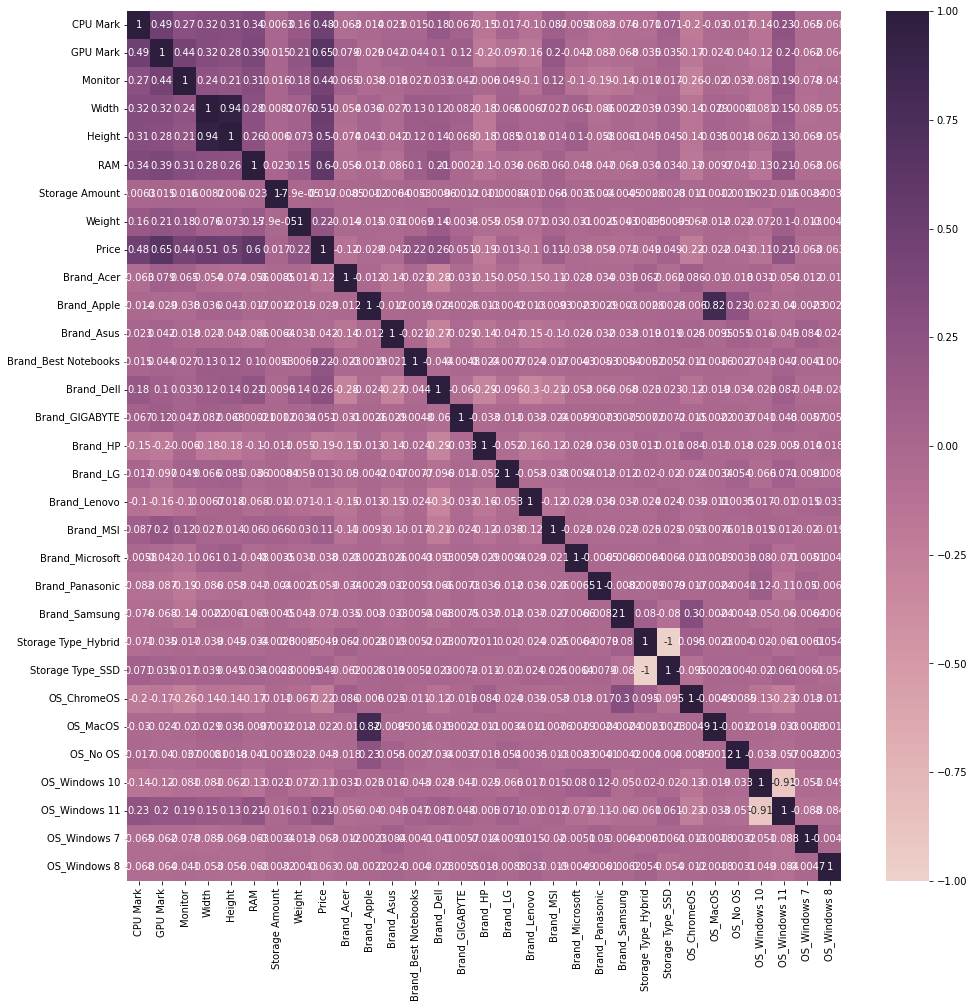

In [139]:
plt.figure(figsize=(16,16))
sn.heatmap(df_filtered.corr(), annot=True, cmap=sn.cubehelix_palette(as_cmap=True))

In [117]:
target_corr = df_filtered.corr()["Price"].apply(abs).sort_values()
target_corr

Brand_LG                0.012841
Storage Amount          0.016952
OS_MacOS                0.021852
Brand_Apple             0.028914
Brand_Microsoft         0.038383
Brand_Asus              0.042242
OS_No OS                0.043109
Storage Type_Hybrid     0.049073
Storage Type_SSD        0.049073
Brand_GIGABYTE          0.050904
Brand_Panasonic         0.058774
OS_Windows 8            0.063315
OS_Windows 7            0.063356
Brand_Samsung           0.071456
Brand_Lenovo            0.104978
Brand_MSI               0.105994
OS_Windows 10           0.110719
Brand_Acer              0.117190
Brand_HP                0.194869
OS_Windows 11           0.211991
Brand_Best Notebooks    0.215002
Weight                  0.216028
OS_ChromeOS             0.221393
Brand_Dell              0.261853
Monitor                 0.438686
CPU Mark                0.479713
Height                  0.497877
Width                   0.510539
RAM                     0.604902
GPU Mark                0.649136
Price     

In [233]:
selected_features = list(target_corr[-22:].index)
selected_features

['Brand_GIGABYTE',
 'Brand_Panasonic',
 'OS_Windows 8',
 'OS_Windows 7',
 'Brand_Samsung',
 'Brand_Lenovo',
 'Brand_MSI',
 'OS_Windows 10',
 'Brand_Acer',
 'Brand_HP',
 'OS_Windows 11',
 'Brand_Best Notebooks',
 'Weight',
 'OS_ChromeOS',
 'Brand_Dell',
 'Monitor',
 'CPU Mark',
 'Height',
 'Width',
 'RAM',
 'GPU Mark',
 'Price']

In [234]:
limited_df = df_filtered[selected_features]
limited_df

,Brand_GIGABYTE,Brand_Panasonic,OS_Windows 8,OS_Windows 7,Brand_Samsung,Brand_Lenovo,Brand_MSI,OS_Windows 10,Brand_Acer,Brand_HP,OS_Windows 11,Brand_Best Notebooks,Weight,OS_ChromeOS,Brand_Dell,Monitor,CPU Mark,Height,Width,RAM,GPU Mark,Price
0,0,0,0,0,0,0,1,0,0,0,1,0,3.03,0,0,15.6,26454.0,1080.0,1920.0,16384.0,7320.0,1529.00
1,0,0,0,0,0,0,0,1,0,0,0,0,2.47,0,1,16.0,19333.0,1200.0,1920.0,24576.0,1449.0,1079.00
2,0,0,0,0,0,0,0,1,0,0,0,0,1.92,0,1,15.6,16550.0,1200.0,1920.0,32768.0,8274.0,1907.00
3,0,0,0,0,0,0,0,0,0,0,1,0,2.68,0,0,17.3,55651.0,1400.0,2560.0,16384.0,26876.0,1959.99
4,0,0,0,0,0,1,0,0,0,0,1,0,2.62,0,0,16.0,24887.0,1600.0,2560.0,16384.0,22459.0,1499.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,0,0,0,0,0,0,0,0,0,1,0,0,1.73,1,0,15.6,387.0,768.0,1366.0,8192.0,1476.0,299.00
2898,0,0,0,0,0,0,0,0,0,1,1,0,1.82,0,0,15.6,15287.0,1080.0,1920.0,49152.0,1449.0,1129.99
2899,0,0,0,0,0,0,0,0,0,1,1,0,1.45,0,0,14.0,1556.0,768.0,1366.0,4096.0,1476.0,197.00
2900,0,0,0,0,0,1,0,1,0,0,0,0,1.45,0,0,16.0,10329.0,1200.0,1920.0,16384.0,7320.0,1289.00


<AxesSubplot:>

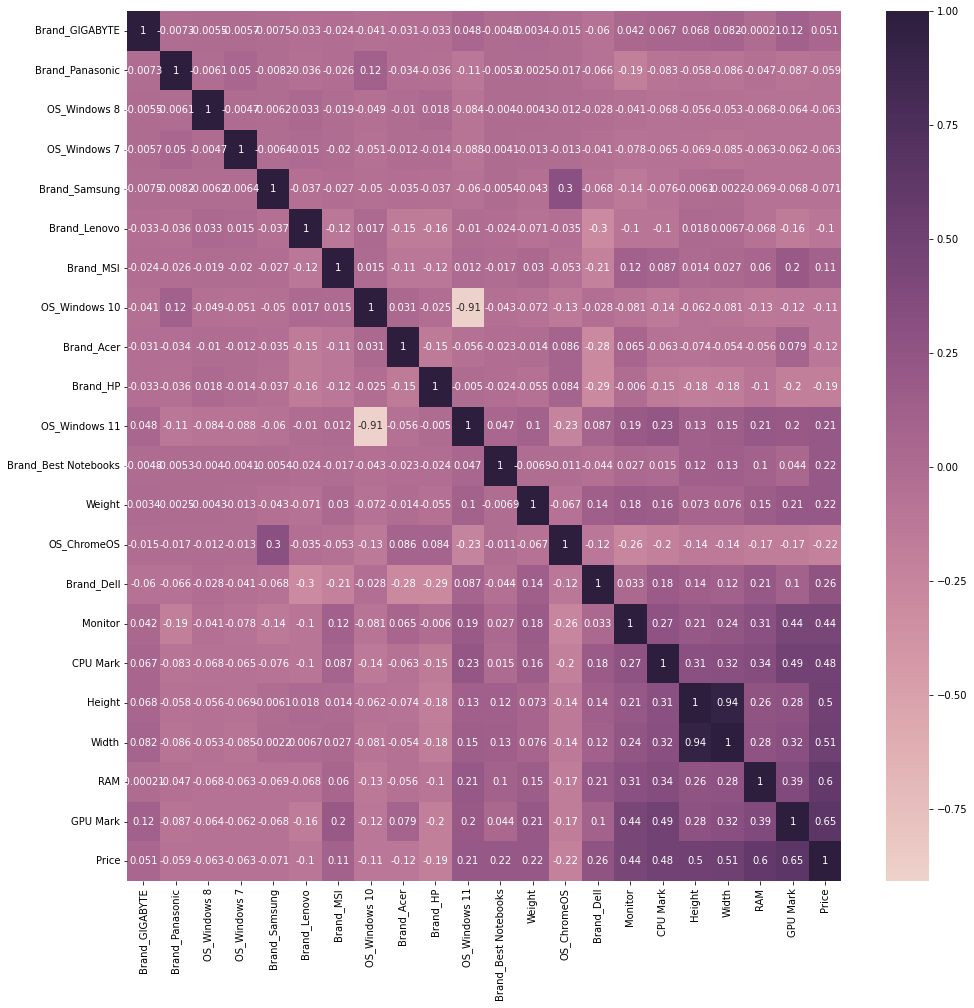

In [235]:
plt.figure(figsize=(16,16))
sn.heatmap(limited_df.corr(), annot=True, cmap=sn.cubehelix_palette(as_cmap=True))

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline

In [210]:
X, y = limited_df.drop("Price", axis=1), limited_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

scaler = StandardScaler()
X_train_scalered = scaler.fit_transform(X_train)
X_test_scalered = scaler.fit_transform(X_test)

svm_ = LinearSVR()
svm_.fit(X_train_scalered, y_train)

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR()

In [211]:
svm_.score(X_test_scalered, y_test)

0.5721022884498244

In [212]:
y_pred = svm_.predict(X_test_scalered)

In [213]:
mean_squared_error(y_test, y_pred)

207652.44005281496

Text(0, 0.5, 'Target')

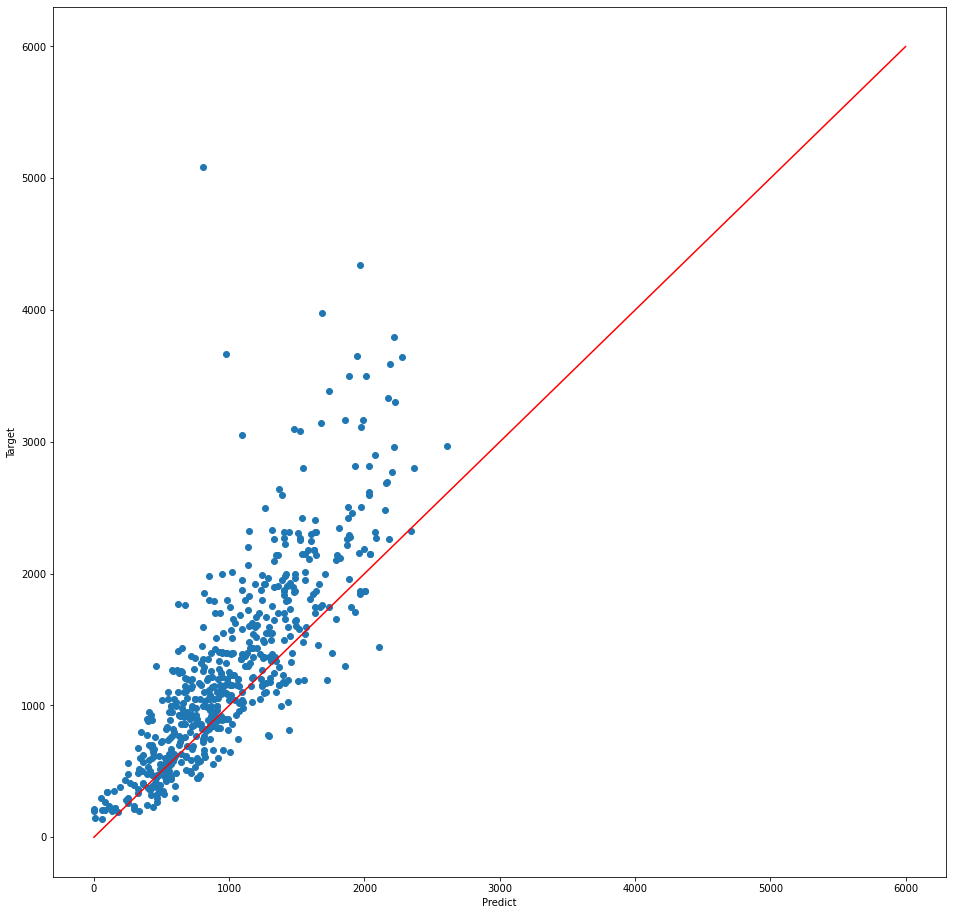

In [193]:
plt.figure(figsize=(16,16))
plt.scatter(y_pred, y_test)
plt.plot(range(0,6000), range(0,6000), c='red')
plt.xlabel('Predict')
plt.ylabel('Target')


In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

In [244]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 200],
    'epsilon': [0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 800, 1000],
    'tol': [1e-4, 1e-3, 1e-2]
}

svr = LinearSVR()

grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scalered, y_train)

GridSearchCV(estimator=LinearSVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 200],
                         'epsilon': [0.01, 0.1, 1, 10],
                         'max_iter': [100, 500, 800, 1000],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_squared_error')

In [251]:
print("Best Params:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Params: {'C': 200, 'epsilon': 0.1, 'max_iter': 100, 'tol': 0.01}
Best Score: 187170.59136872395


In [249]:
y_pred = grid_search.best_estimator_.predict(X_test_scalered)

In [250]:
mse = mean_squared_error(y_test, y_pred)
mse

154183.66011988363

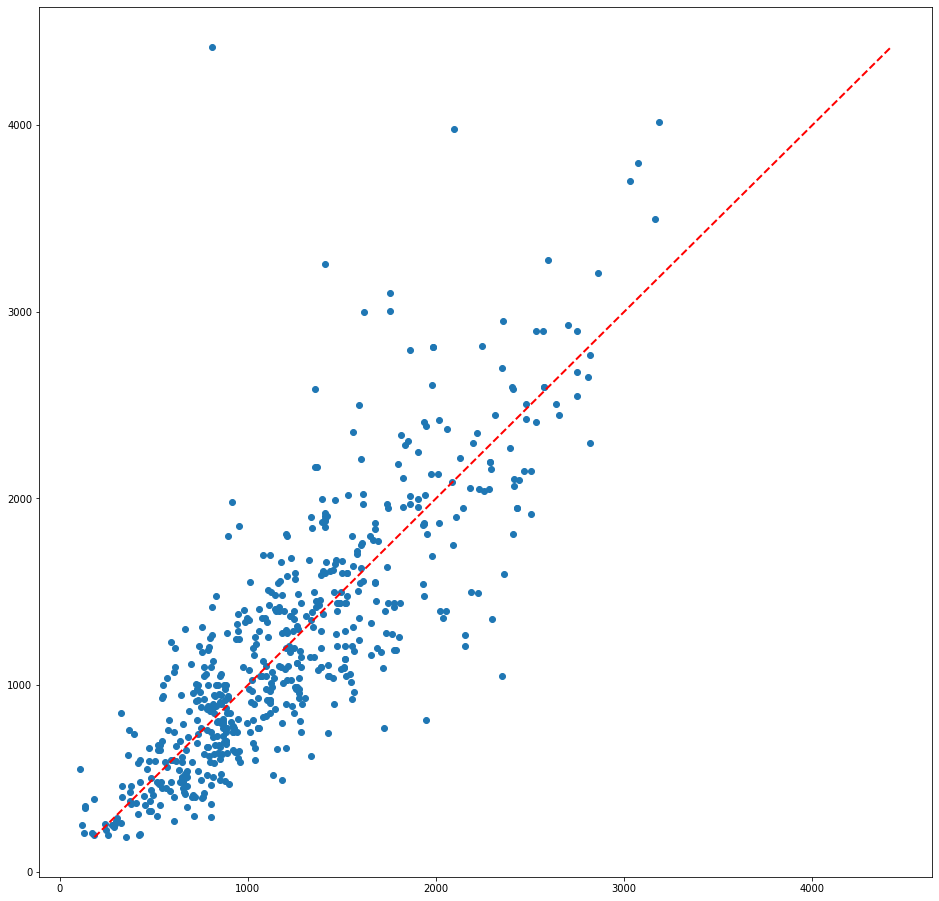

In [240]:
plt.figure(figsize=(16, 16))
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

In [241]:
from sklearn.svm import SVR

In [255]:
svr = SVR(kernel='linear')

svr.fit(X_train_scalered, y_train)

svr.score(X_test_scalered, y_test)

y_pred = svr.predict(X_test_scalered)
mean_squared_error(y_test, y_pred)

155058.81683623616

In [252]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

svr = SVR()

grid_search2 = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error')

grid_search2.fit(X_train_scalered, y_train)

print("Best Params:", grid_search2.best_params_)
print("Best Score:", -grid_search2.best_score_)

Best Params: {'C': 100, 'epsilon': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 205633.2776703881


In [254]:
y_pred = grid_search2.best_estimator_.predict(X_test_scalered)
mean_squared_error(y_test, y_pred)

153578.10005432938